# Exploration of Titanic Fares

For this project I will be exploring a classic toy dataset, the Titanic passengers data. Since I always see this used to explore what factors make people more likely to survive, I think it will be interesting to instead explore what factors lead to the fare paid for each passenger.

I will be exploring how the following factors affect fare paid:
- Sex
- Family (SibSP & Parch)
- PClass
- Age

This will be a simple exploratory analysis, so I won't be doing rigid statistical tests and will just be looking at what the data seems to imply. Let's get started!


## Data Acquisition, Standardization, and Cleaning

In [213]:
%matplotlib inline

# IMPORTS, HELPER FUNCTIONS, AND DATA PREP

import pandas as pd
import numpy as np
from ggplot import *

titanic = pd.read_csv("titanic-data.csv")

def standardize(col):
    '''Standardizes the column passed to it'''
    return (col- col.mean())/ col.std(ddof = 1)

# Creating a variable of total family memebers onboard
titanic['Family'] = titanic['SibSp'] + titanic['Parch']

# Copy and standardize dataset
standardized_titanic = titanic.copy()

# Some of the numerical values are catagorical and should not be standardized
standardized_titanic['Age'] = standardize(standardized_titanic['Age'])
standardized_titanic['SibSp'] = standardize(standardized_titanic['SibSp'])
standardized_titanic['Parch'] = standardize(standardized_titanic['Parch'])
standardized_titanic['Family'] = standardize(standardized_titanic['Family'])
standardized_titanic['Fare'] = standardize(standardized_titanic['Fare'])

percent_missing_age = sum(titanic['Age'].isnull())/float(len(titanic['Age']))

print "%s of passengers are missing the Age variable" % round(percent_missing_age, 2)

0.2 of passengers are missing the Age variable


Overall the data is in pretty good shape. It looks like Age is the only column that we are interested in which is missing any values. While 20% of passengers missing their age info is kind of a lot, there isn't an obvious strategy (or need) to impute the data without distorting any trends that might be interesting so I will be dropping all missing values when exploring age.

I have prepared a standardized version of the data so that we can use it to compare multiple numeric values, for exploring categorical values I will stick to the raw data though. 

I also added a column for total number of family members on board by combining SibSp (siblings and spouse count) and Parch (parent and children count). So a single person with no family on board will have a Family value of 0, a couple would each have a value of 1, and so on.

## Exploring the Data

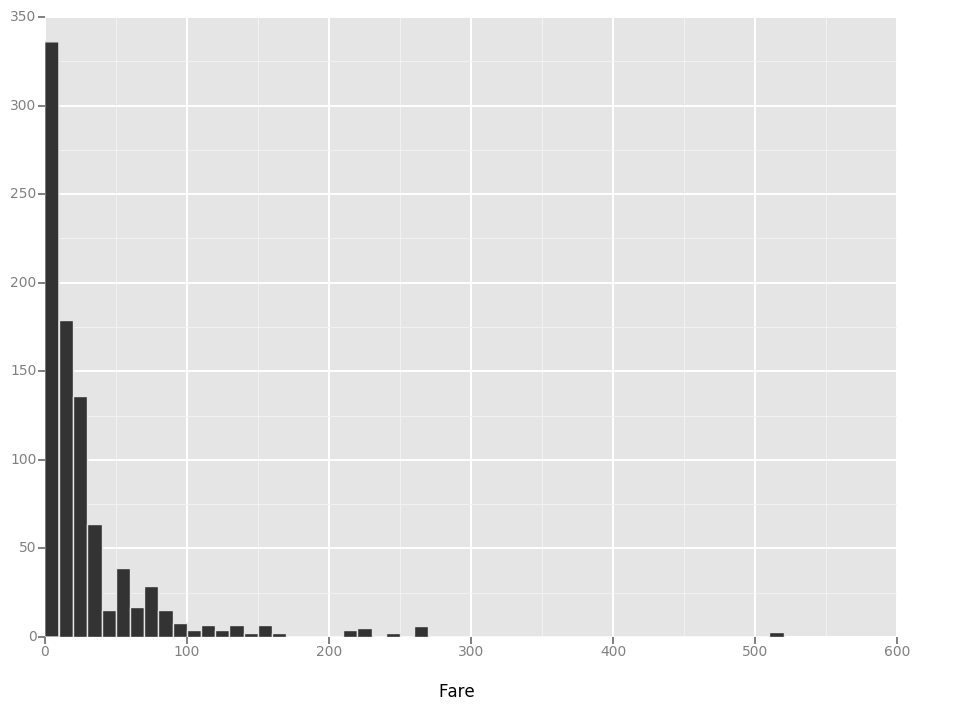

<ggplot: (279176473)>
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [189]:
print ggplot(aes(x='Fare'), data = titanic) +\
            geom_histogram(binwidth= 10)
    
print titanic['Fare'].describe()

We can see that the majority of passengers had the cheaper fairs with the median passengers paying \$14.45 or less. Which would make sense since you would assume that they would build any cruise ship to be mostly standard accommodations. With the average ticket price being \$32.20 but half the passengers paying under \$14.45 we can tell some of the luxury tickets are much more expensive (and this is obvious in the histogram). 

The minimum and maximum here are somewhat interesting too. While some people managed to score free tickets, others paid \$512.32, about 16x the average ticket price!

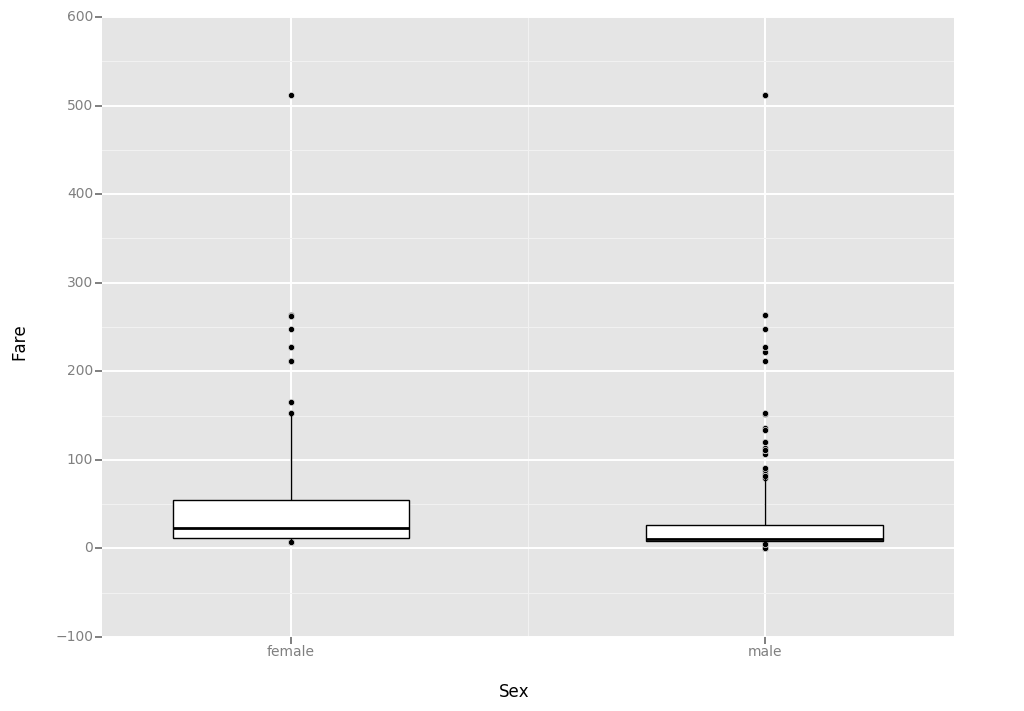

<ggplot: (276534769)>
The passangers were 0.65 male and 0.35 female.


In [190]:
print ggplot(aes(x='Sex', y='Fare'), data = titanic) +\
            geom_boxplot()

# Check if all entrys are male or female (evaluates to True)
sum(titanic['Sex'] != 'male') == sum(titanic['Sex'] == 'female')

perc_male = sum(titanic['Sex']== 'male')/float(len(titanic['Sex']))
perc_male = round(perc_male, 2)
print 'The passangers were %s male and %s female.' % (perc_male, 1-perc_male)


In [187]:
table_prep = titanic[['Sex', 'Family']]

# Get counts of number of family memeber onboard by gender
family_members_by_sex = table_prep.groupby(['Sex','Family']).size()

# Convert to proportions so we can compare
print family_members_by_sex[0:9] / sum(titanic['Sex']=='female')
print family_members_by_sex[9:] / sum(titanic['Sex']=='male')

Sex     Family
female  0         0.401274
        1         0.277070
        2         0.156051
        3         0.060510
        4         0.038217
        5         0.025478
        6         0.025478
        7         0.006369
        10        0.009554
dtype: float64
Sex   Family
male  0         0.712305
      1         0.128250
      2         0.091854
      3         0.017331
      4         0.005199
      5         0.024263
      6         0.006932
      7         0.006932
      10        0.006932
dtype: float64


In general it appears that females tend to pay more for their tickets. This should be taken with even more of a grain of salt then the rest of this exploration though, with only 35% of the passengers being female there are likely other confounding factors that led to these specific females being on the Titanic in the first place. Interestingly only 40% of females were traveling on the Titanic without family compared to 71% of males, which lends more credit to the idea that there is more to the story about why female ticket prices were higher.

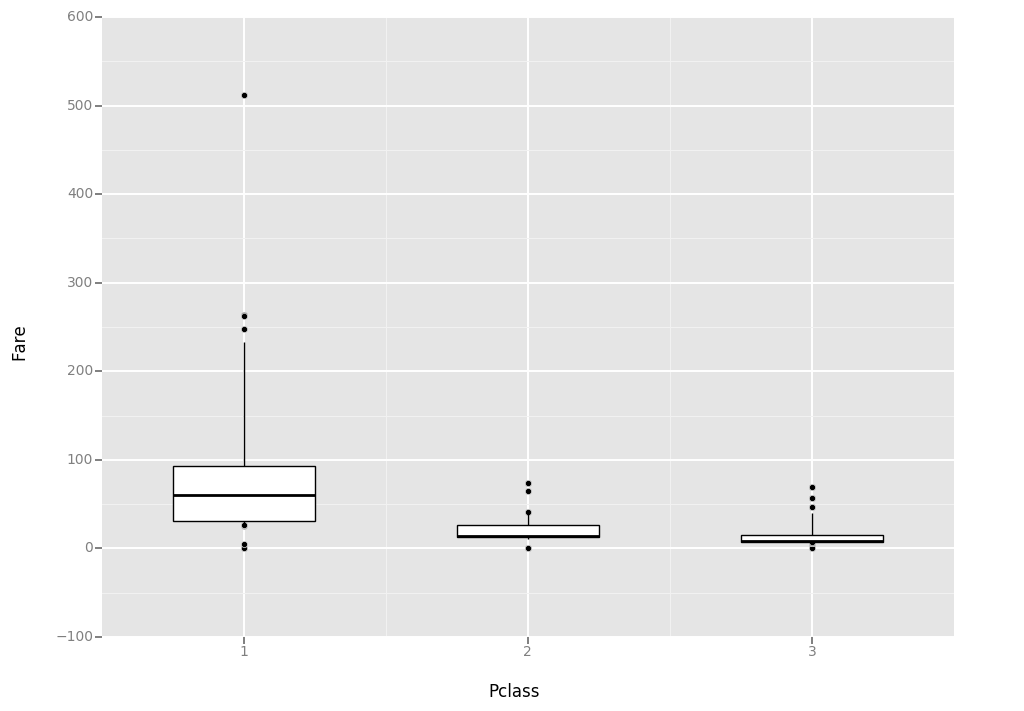

<ggplot: (277027029)>


In [78]:
print ggplot(aes(x='Pclass', y='Fare'), data = titanic) +\
            geom_boxplot()

As we would expect, people generally pay the most to be in first class, then second class, and finally third class is usually the cheapest. The outliers in this boxplot are pretty interesting to me though because we can see that there are people in second and third class that paid the same amount as those in first class. We also see that some people scored really cheap first class tickets.

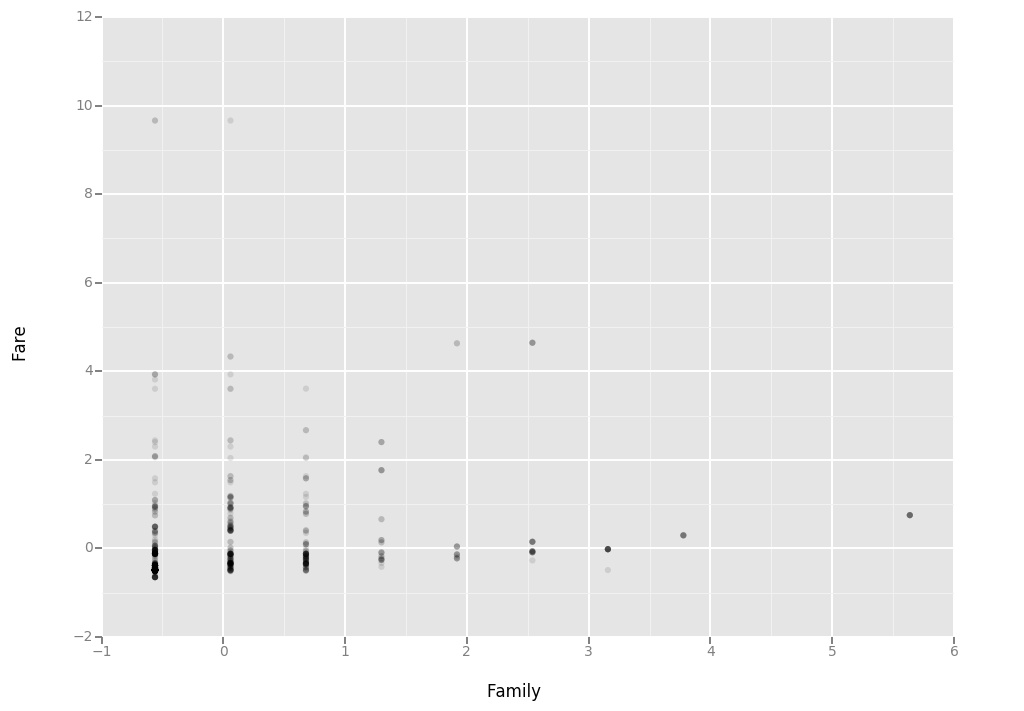

<ggplot: (279889765)>
Passangers have an average of 0.9 family members onboard.
Correlation for Family and Fair: 0.22


In [192]:
box_family = ggplot(aes(x='Family', y='Fare'), data = standardized_titanic) +\
            geom_boxplot()
point_family = ggplot(aes(x='Family', y='Fare'), data = standardized_titanic) +\
            geom_point(alpha = .1)
            
survived = titanic['Family'].sum()/ float(len(titanic['Survived']))

corr_family_fare = np.corrcoef(standardized_titanic['Family'], standardized_titanic['Fare'])[0][1]

# titanic[['Family','Fare']].groupby('Family').mean()

print point_family
print "Passangers have an average of %s family members onboard." % round(survived,2)
print "Correlation for Family and Fair: %s" % round(corr_family_fare, 2)

It appears that the more family members a person had on the Titanic, the more they likely paid for their ticket(with a correlation of .22). Which makes sense, if you can afford to take your whole family you likely can afford nicer accommodations.

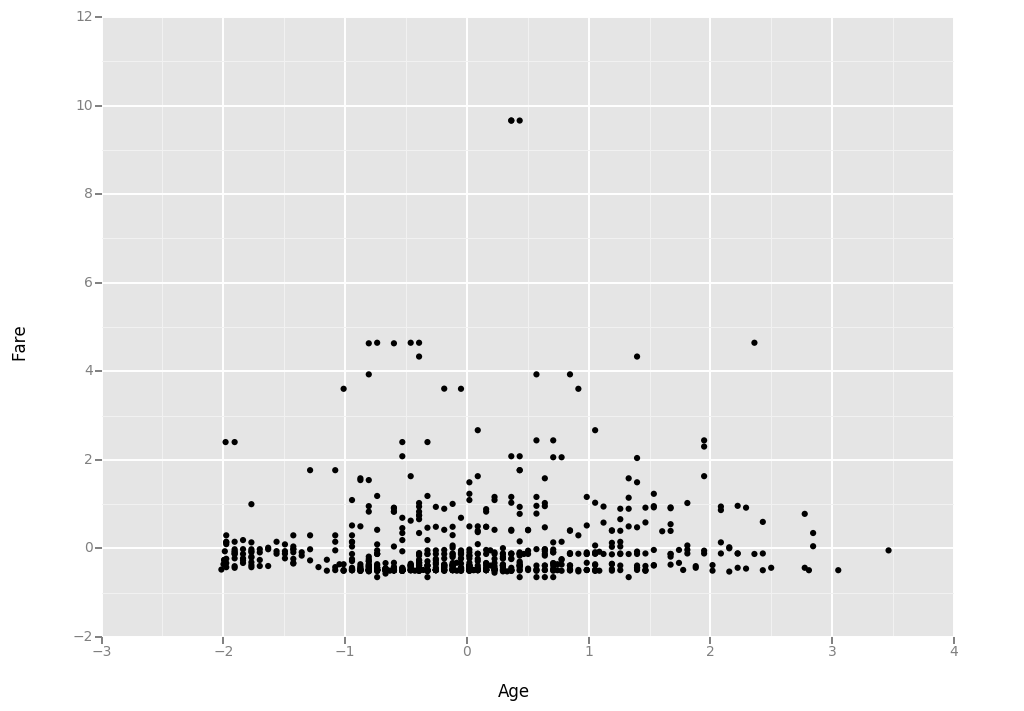

<ggplot: (279903333)>
Correlation for Age and Fair: 0.096066691769


In [193]:
print ggplot(aes(x='Age', y='Fare'), data = standardized_titanic) +\
            geom_point()
    
# I have dropped the rows without an age. There seem to be enough data points with 
# age provided to analize without trying to impute those that are missing.
clean_age_fare = standardized_titanic[['Age','Fare']].dropna()

corr_age_fare = np.corrcoef(clean_age_fare['Age'], clean_age_fare['Fare'])[1][0]
print "Correlation for Age and Fair: %s" % corr_age_fare

Although it is a bit hard to see in the scatterplot, age of a passenger(those that we have an age for) has a correlation of .09 with the fair they paid. So the age of a passenger does seem to generally have some effect on the price they are likely to pay for a ticket.

## Conclusions

In [230]:
print titanic[titanic['Fare'] == titanic['Fare'].max()][[ 'Survived', 'Name', 'Pclass', 'Age','Family']]


     Survived                                Name  Pclass   Age  Family
258         1                    Ward, Miss. Anna       1  35.0       0
679         1  Cardeza, Mr. Thomas Drake Martinez       1  36.0       1
737         1              Lesurer, Mr. Gustave J       1  35.0       0


It is pretty interesting how quickly we are able to start seeing what may have affected the fares that passengers paid on the Titanic. It appears that age, amount of family on board, being female, and (least surprisingly) the ticket's class tend to lead to a higher fair. It's tempting to feel bad for the three passengers that defied the odds by paying the max ticket price while in their mid 30s, with at most one family member, and only one of them being female, but on the bright side they all survived.

As I have stated throughout this exploration, there are likely a lot of confounding factors at play too. With the Titanic being the maiden voyage of an extravagant adventure, the people that would self select to be aboard the Titanic is likely a specific type of person which could introduce all kinds of biases.

While we were able to learn a lot from the limited data available. It would be really interesting to dive in deeper if we could find more information. For example I would love to explore what sort of occupations were most common amongst Titanic passengers, if amount of time in advance of departure tickets were bought affects fare, and affects of education level on fare (or likely hood to be on the Titanic).

Thanks for reading my exploration of the Titanic data set and the fairs paid by passengers, I hope you enjoyed it as much as I enjoyed learning about this data!